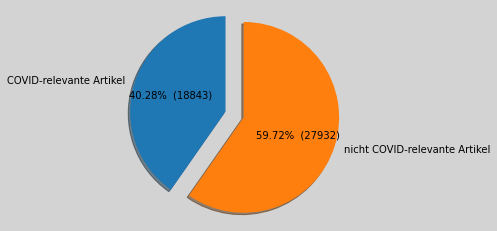

In [2]:
import matplotlib.pyplot as plt

labels = ["COVID-relevante Artikel", "nicht COVID-relevante Artikel"]

prozente = [18843, 46775-18843]

explode = (0.2, 0)

fig1, ax1 = plt.subplots()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig1.set_facecolor('lightgrey')

ax1.pie(prozente, explode = explode, labels = labels, autopct= make_autopct(prozente), shadow=True, startangle=90)

ax1.axis('equal') 

plt.show()





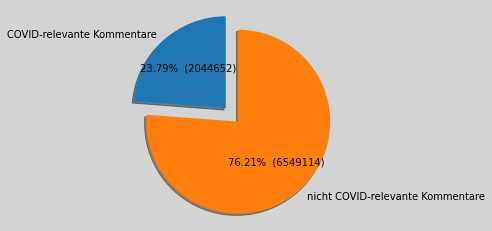

In [3]:
labels = ["COVID-relevante Kommentare", "nicht COVID-relevante Kommentare"]

prozente = [2044652, 8593766-2044652]

explode = (0.2, 0)

fig1, ax1 = plt.subplots()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig1.set_facecolor('lightgrey')

ax1.pie(prozente, explode = explode, labels = labels, autopct= make_autopct(prozente), shadow=True, startangle=90)

ax1.axis('equal') 

plt.show()

In [4]:
from collections import Counter

meine_kommentare = Counter()


with open ("corona_relevante_kommentare", mode = "r+", encoding="utf-8") as f:
    for line in f:
        try:
            meine_kommentare[line.split("\t")[4]] += 1
        except IndexError:
            pass

del meine_kommentare["None"]

anzahl = meine_kommentare.values()





In [5]:
# Zählt wie oft ein Kommentar von einem bestimmten User auf einer bestimmten Ebene auftaucht

from collections import defaultdict
node_counter = defaultdict(Counter)
names = [x[0] for x in meine_kommentare.most_common()[:20]]

with open ("corona_relevante_kommentare", mode = "r+", encoding="utf-8") as f:
    for line in f:
        try:
            if line.split("\t")[4] in names:
                #print(line.split("\t")[4],line.split("\t")[3]) 
                node_counter[line.split("\t")[4]].update(line.split("\t")[3])
        except IndexError:
            pass

print(node_counter)



defaultdict(<class 'collections.Counter'>, {'mhwse': Counter({'1': 2089, '3': 1582, '2': 1493, '0': 670}), 'Torben-k7b2MJlWR': Counter({'2': 3076, '1': 2784, '3': 2714, '0': 263}), 'HolgerHamburgo': Counter({'1': 2065, '3': 1880, '0': 1367, '2': 1346}), 'Karl-tBDI7C7ZR': Counter({'3': 2052, '2': 1732, '1': 1517, '0': 712}), 'Alwin-hVe4_eMMg': Counter({'1': 3976, '3': 3799, '2': 1136, '0': 178}), 'Knutie': Counter({'3': 6753, '1': 2537, '2': 2160, '0': 24}), 'Jürgen-UYQ1UxHMg': Counter({'1': 2240, '3': 1918, '2': 1165, '0': 109}), 'Engineer': Counter({'3': 1966, '1': 1900, '2': 1472, '0': 384}), 'iris_b': Counter({'3': 7879, '1': 5956, '2': 3852, '0': 1520}), 'Ro_Laren': Counter({'3': 2508, '1': 1372, '2': 1125, '0': 572}), 'Alex-jFlznaUWR': Counter({'1': 2590, '3': 1984, '2': 1216, '0': 227}), 'Tullius': Counter({'3': 8718, '1': 5598, '2': 3595, '0': 1355}), 'HeiterbisWolkig': Counter({'3': 6869, '1': 2675, '2': 1694, '0': 38}), 'Jürgen-SzIee4RMg': Counter({'3': 3869, '1': 3290, '2': 2

In [32]:
# Zählt die Monate der Kommentare, in welchem Monat wurde der Kommentar verfasst und speichert im Dicionary
MonthCounterCOVID = defaultdict(Counter)
MonthCounterNOCOV = defaultdict(Counter)
monthDict={"01":'Jan', "02":'Feb', "03":'Mar', "04":'Apr', "05":'May', "06":'Jun', "07":'Jul', "08":'Aug', "09":'Sep', "10":'Oct', "11":'Nov', "12":'Dec'}
covid_ids = set()

with open ("corona_relevante_kommentare", mode = "r+", encoding="utf-8") as f:
    for line in f:
        try:
            covid_ids.add(line.split("\t")[0])
            MonthCounterCOVID[line.split("\t")[1][2:4]].update({monthDict[line.split("\t")[1][5:7]]: 1})
            #MonthCounter[monthDict[line.split("\t")[1][5:7]]] += 1
        except IndexError:
            pass

MonthCounterCOVID

defaultdict(collections.Counter,
            {'20': Counter({'Mar': 99183,
                      'Apr': 156602,
                      'May': 114948,
                      'Jun': 58923,
                      'Jul': 56837,
                      'Aug': 86039,
                      'Sep': 52441,
                      'Oct': 127308,
                      'Nov': 126481,
                      'Dec': 162933,
                      'Feb': 13182,
                      'Jan': 1766}),
             '21': Counter({'Feb': 146887,
                      'Jul': 88865,
                      'Jan': 201770,
                      'Jun': 95462,
                      'Mar': 183305,
                      'Apr': 163084,
                      'May': 106470})})

In [31]:
with open ("alle_kommentare.txt", mode = "r+", encoding="utf-8") as f:
    for line in f:
        try:
            if line.split("\t")[0] not in covid_ids:
                MonthCounterNOCOV[line.split("\t")[1][2:4]].update({monthDict[line.split("\t")[1][5:7]]: 1})
                #MonthCounter[monthDict[line.split("\t")[1][5:7]]] += 1
        except IndexError:
            pass

MonthCounterNOCOV

defaultdict(collections.Counter,
            {'20': Counter({'Mar': 135286,
                      'Jul': 300807,
                      'Jun': 241689,
                      'Apr': 156459,
                      'May': 220849,
                      'Dec': 332476,
                      'Oct': 318162,
                      'Aug': 321061,
                      'Nov': 338839,
                      'Sep': 345728,
                      'Feb': 141978,
                      'Jan': 66132}),
             '21': Counter({'Jun': 404149,
                      'Feb': 350296,
                      'Mar': 429417,
                      'Apr': 443569,
                      'Jan': 388380,
                      'May': 395213,
                      'Jul': 252809,
                      'Aug': 3})})

In [73]:
import pandas as pd

Text(0, 0.5, 'Anzahl der Kommentare')

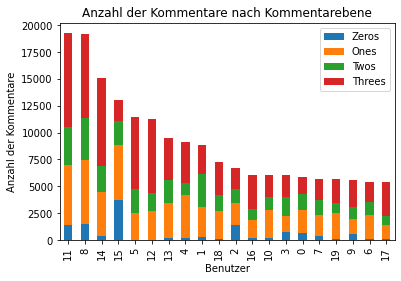

In [98]:
new_names = [x[0] for x in node_counter.items()]
zeros = [x[1]["0"] for x in node_counter.items()]
ones = [x[1]["1"] for x in node_counter.items()]
twos = [x[1]["2"] for x in node_counter.items()]
threes = [x[1]["3"] for x in node_counter.items()]
summe = [a + b +c + d for a,b,c,d in zip(zeros, ones, twos, threes) ]

df = pd.DataFrame({"Names": new_names, "Zeros": zeros, "Ones": ones, "Twos": twos, "Threes": threes, "Sum": summe})

df = df.sort_values("Sum", ascending= False)

del df["Sum"]

ax = df.plot(kind ="bar", stacked = True, title="Anzahl der Kommentare nach Kommentarebene")
ax.set_xlabel("Benutzer")
ax.set_ylabel("Anzahl der Kommentare")


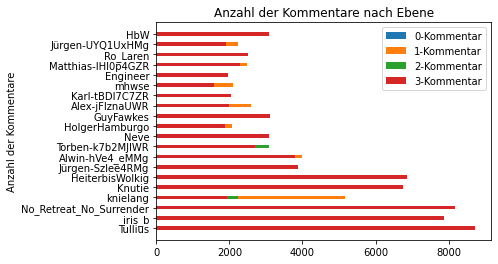

In [92]:
# width = 0.35

# fig = plt.figure()
# ax = fig.add_subplot(111)

# ax.barh(names_sorted, zeros_sorted, width, label="0-Kommentar")
# ax.barh(names_sorted, ones_sorted, width, label="1-Kommentar")
# ax.barh(names_sorted, twos_sorted, width, label="2-Kommentar")
# ax.barh(names_sorted, threes_sorted, width, label="3-Kommentar")

# ax.set_ylabel("Anzahl der Kommentare")
# ax.set_title("Anzahl der Kommentare nach Ebene")
# ax.legend()

# plt.show()

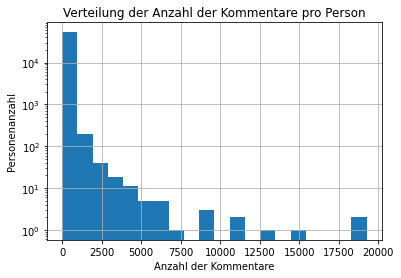

In [36]:
values = meine_kommentare.values()
n, bins, patches = plt.hist(values, bins=20)

plt.xlabel('Anzahl der Kommentare')
plt.ylabel('Personenanzahl')
plt.yscale("log")
plt.title('Verteilung der Anzahl der Kommentare pro Person')
plt.grid(True)
plt.show()

In [29]:
top20 = meine_kommentare.most_common(20)
namen, kommentare = zip(*top20)



In [37]:
import statistics

kommentaremedian = statistics.median(anzahl)
print(f"Median:{kommentaremedian}")
print(f"Mean {statistics.mean(anzahl)}")

Median:3.0
Mean 37.39085750789118


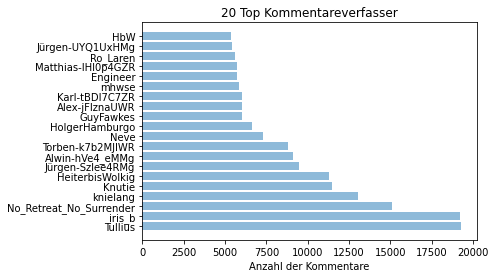

In [31]:
import numpy as np

y_pos = np.arange(len(namen))

plt.barh(y_pos, kommentare, align="center", alpha=0.5)
plt.yticks(y_pos, namen)
plt.xlabel("Anzahl der Kommentare")
plt.title("20 Top Kommentareverfasser")

plt.show()